# 1. Loading and Preprocessing 

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()


In [5]:
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [7]:
# Add target column
df['target'] = iris.target

In [9]:
# Display the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2.Clustering Algorithm Implementation

In [ ]:
#A) KMeans Clustering

C:\Users\Cyntexia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


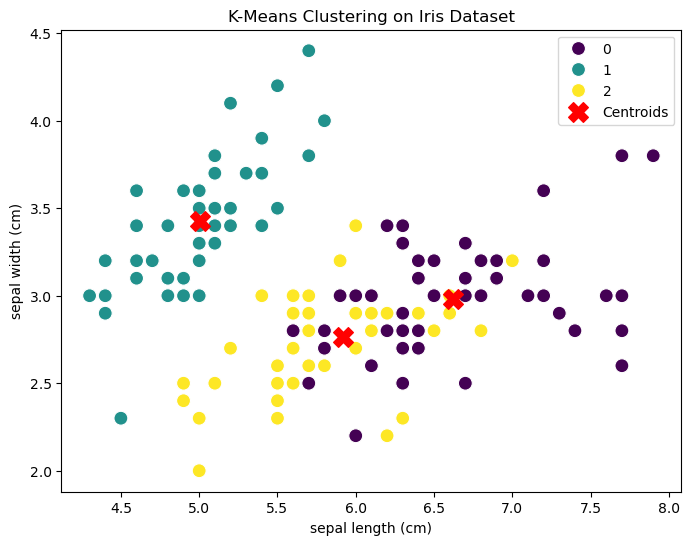

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply K-Means clustering
k = 3  # Choosing 3 clusters since Iris has 3 species
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df)

# Plot the clusters using the first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster'], palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()


In [ ]:
#B) Hierarchical Clustering

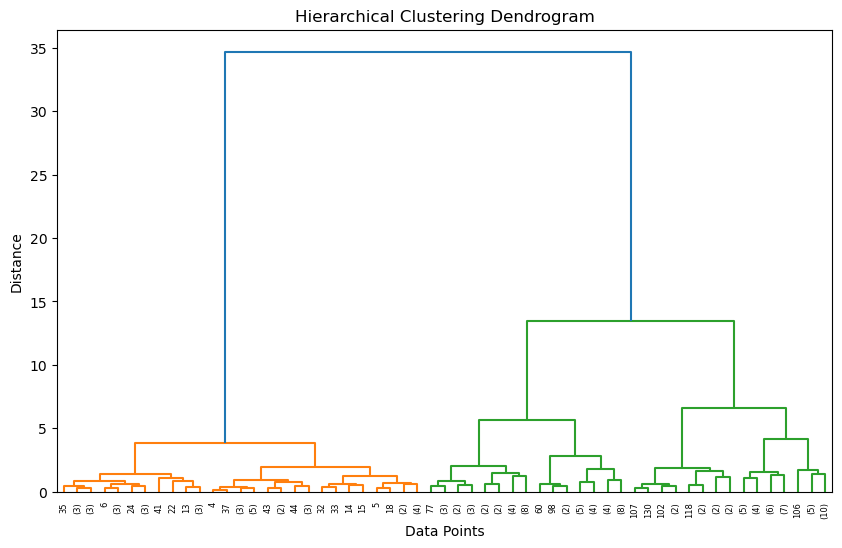

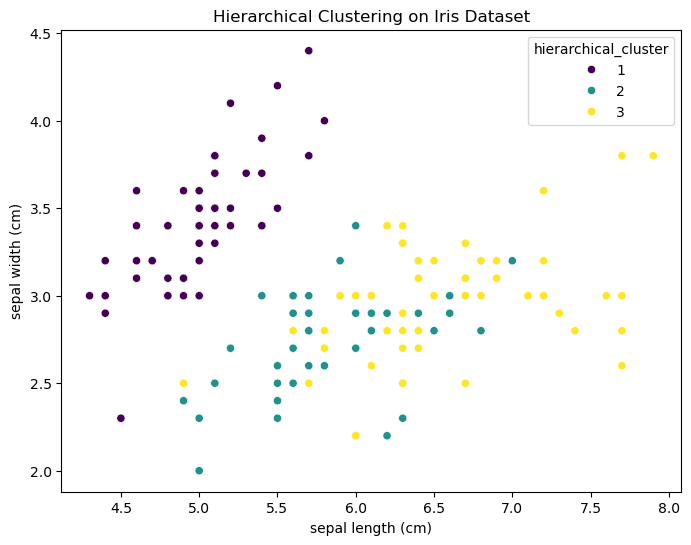

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(df.iloc[:, :-2], method='ward')  # Excluding target & KMeans cluster

# Dendrogram visualization
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Assign clusters
df['hierarchical_cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# Scatter plot visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['hierarchical_cluster'], palette='viridis')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
